# **Gradient Descent**

**Techinique called Gradient Descent can help you find these parameters**

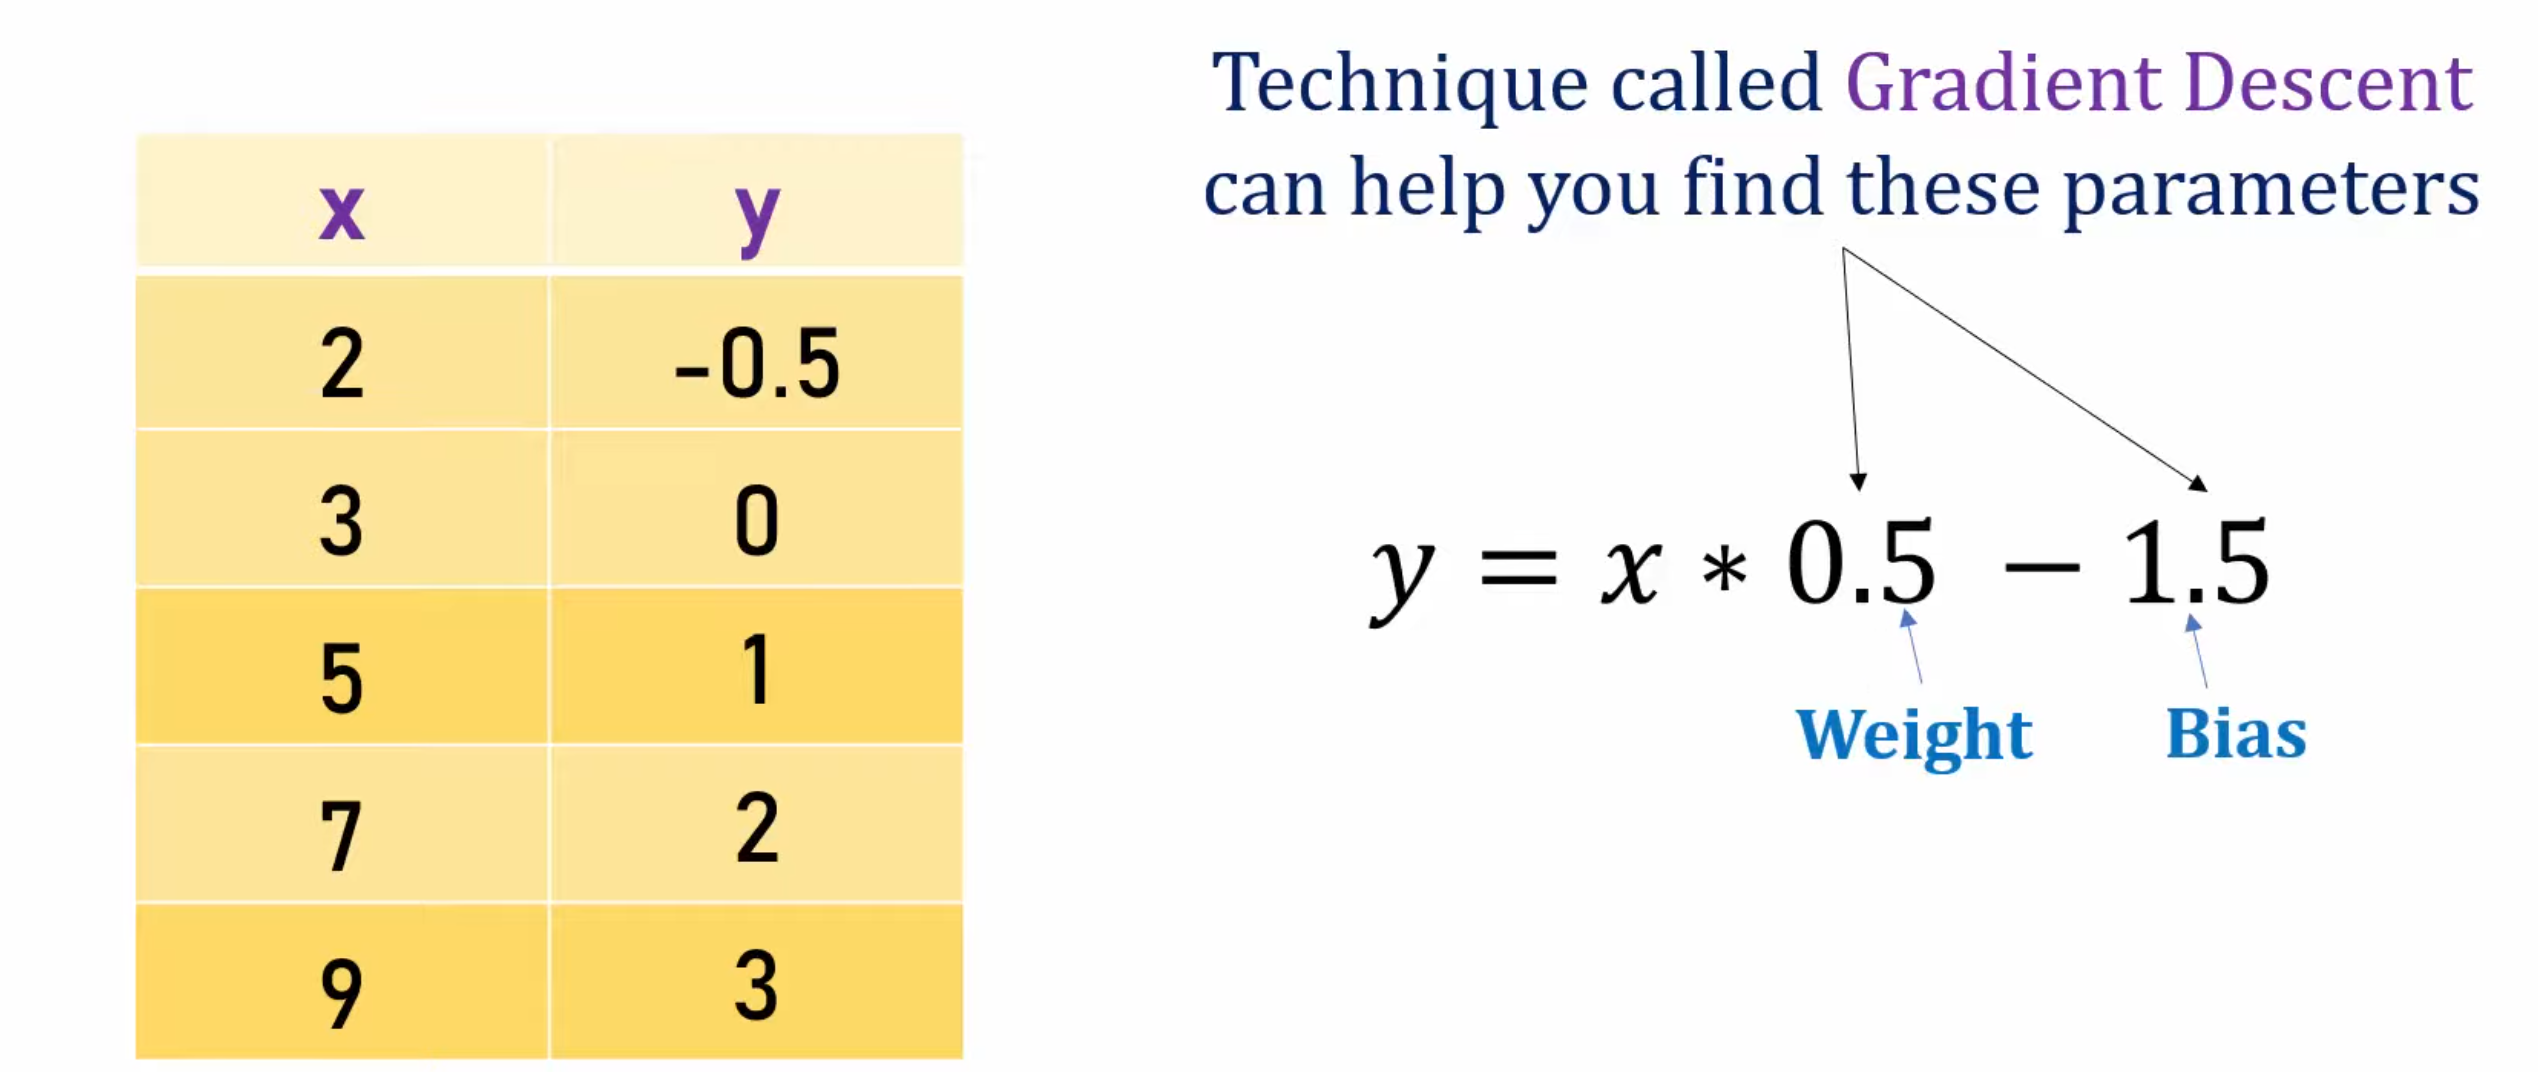

# **Batch Gradient**

**Initial we assume the basis and weights by own**

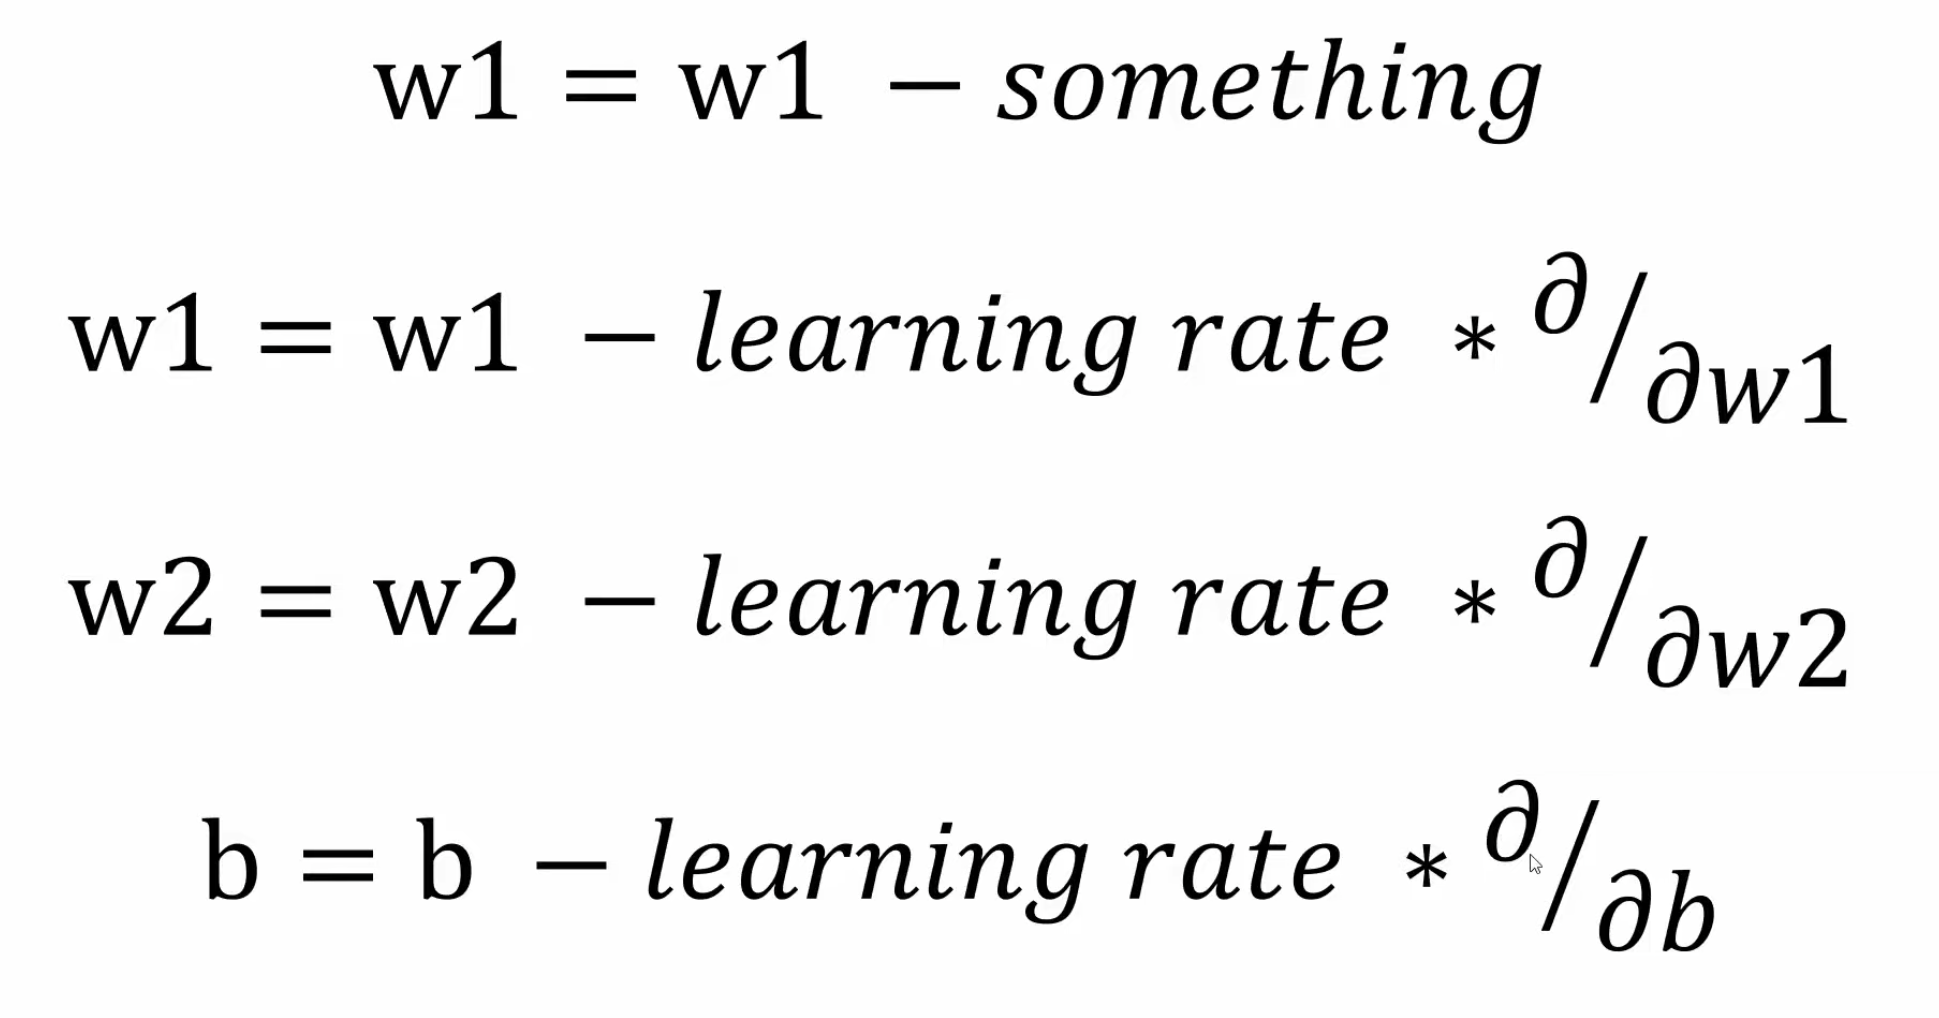

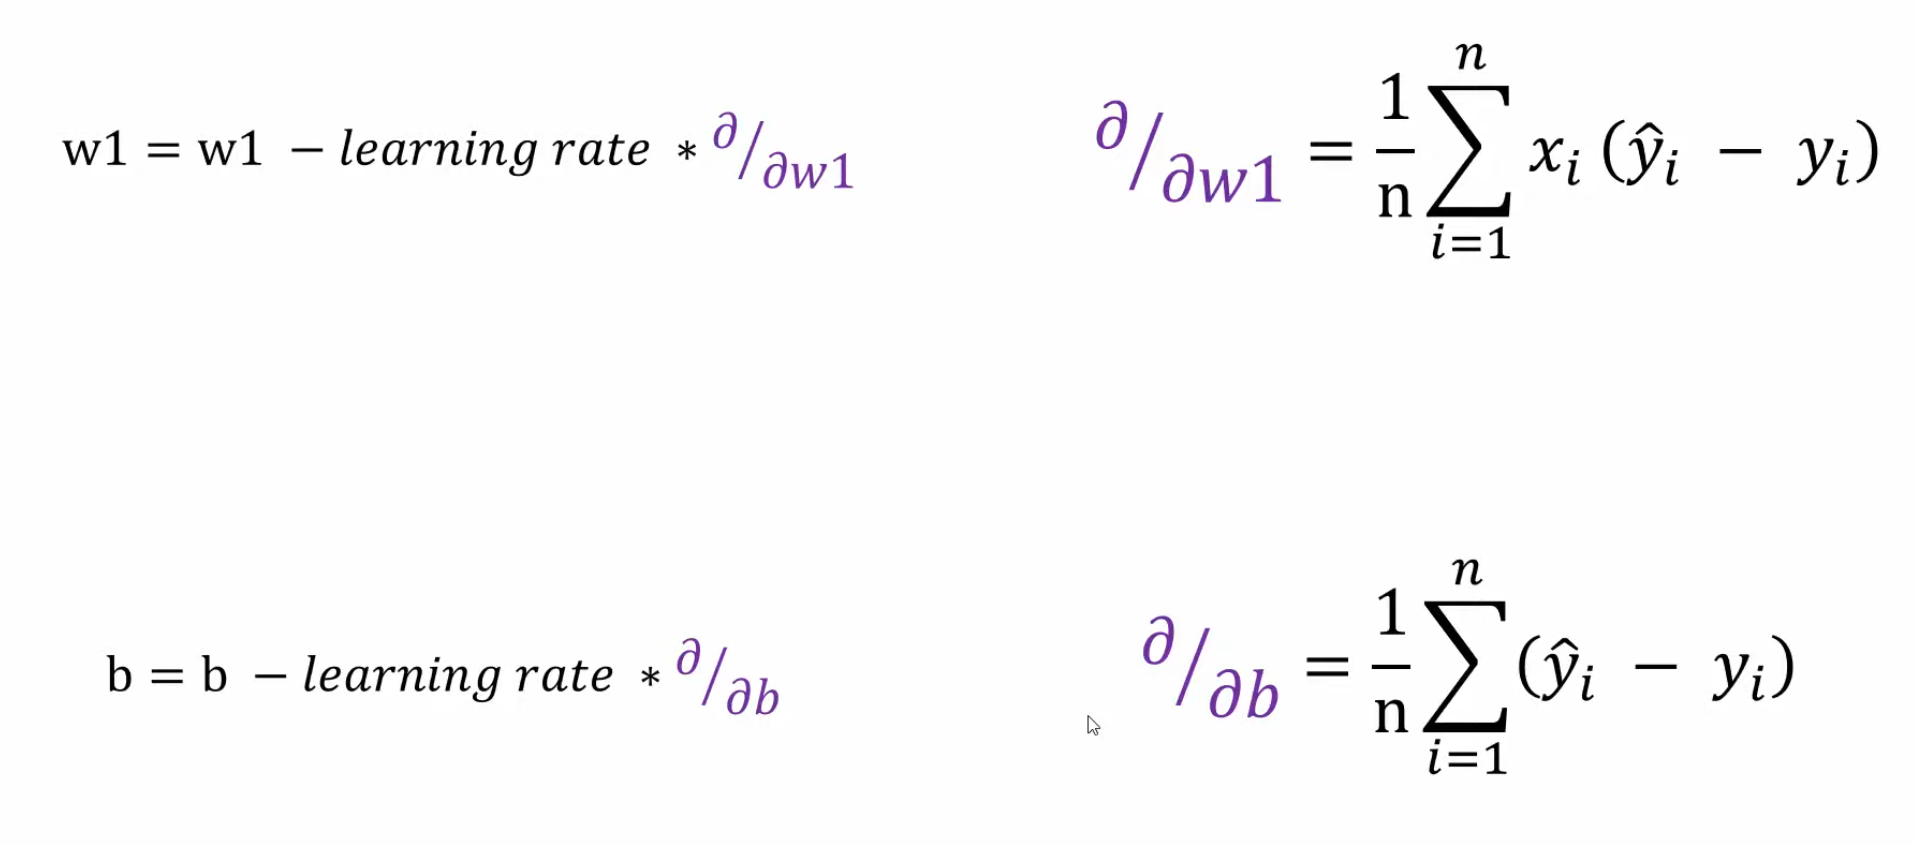

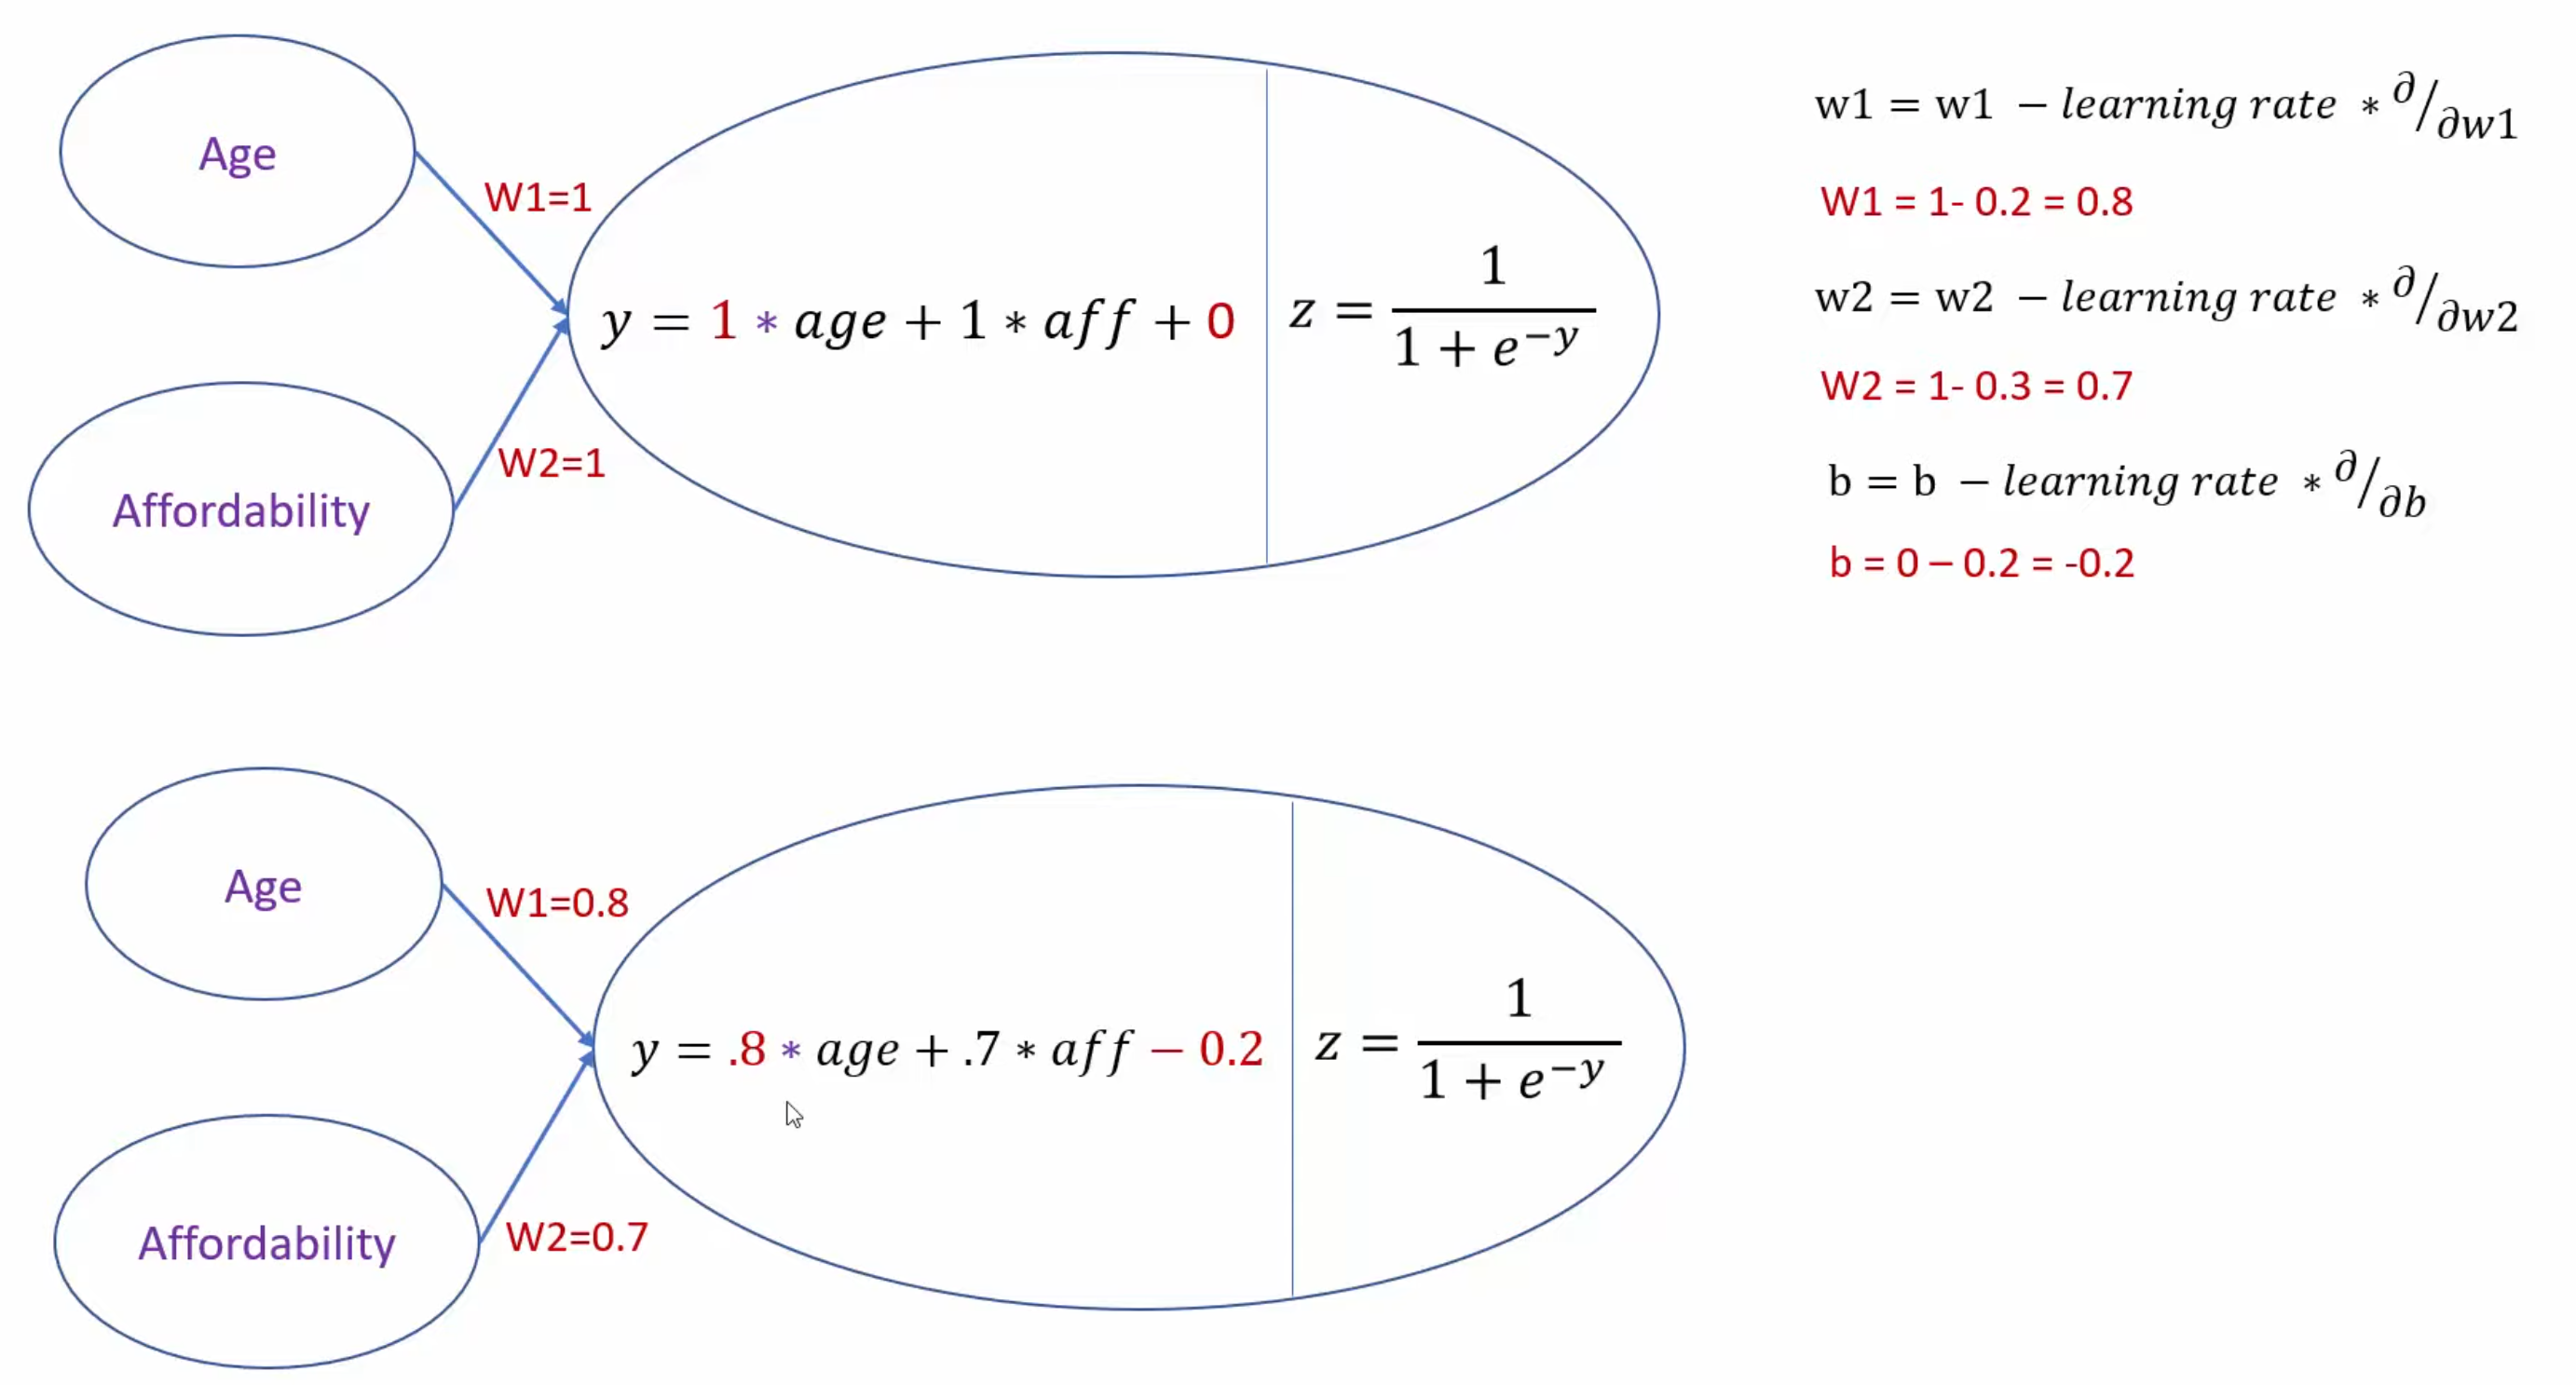

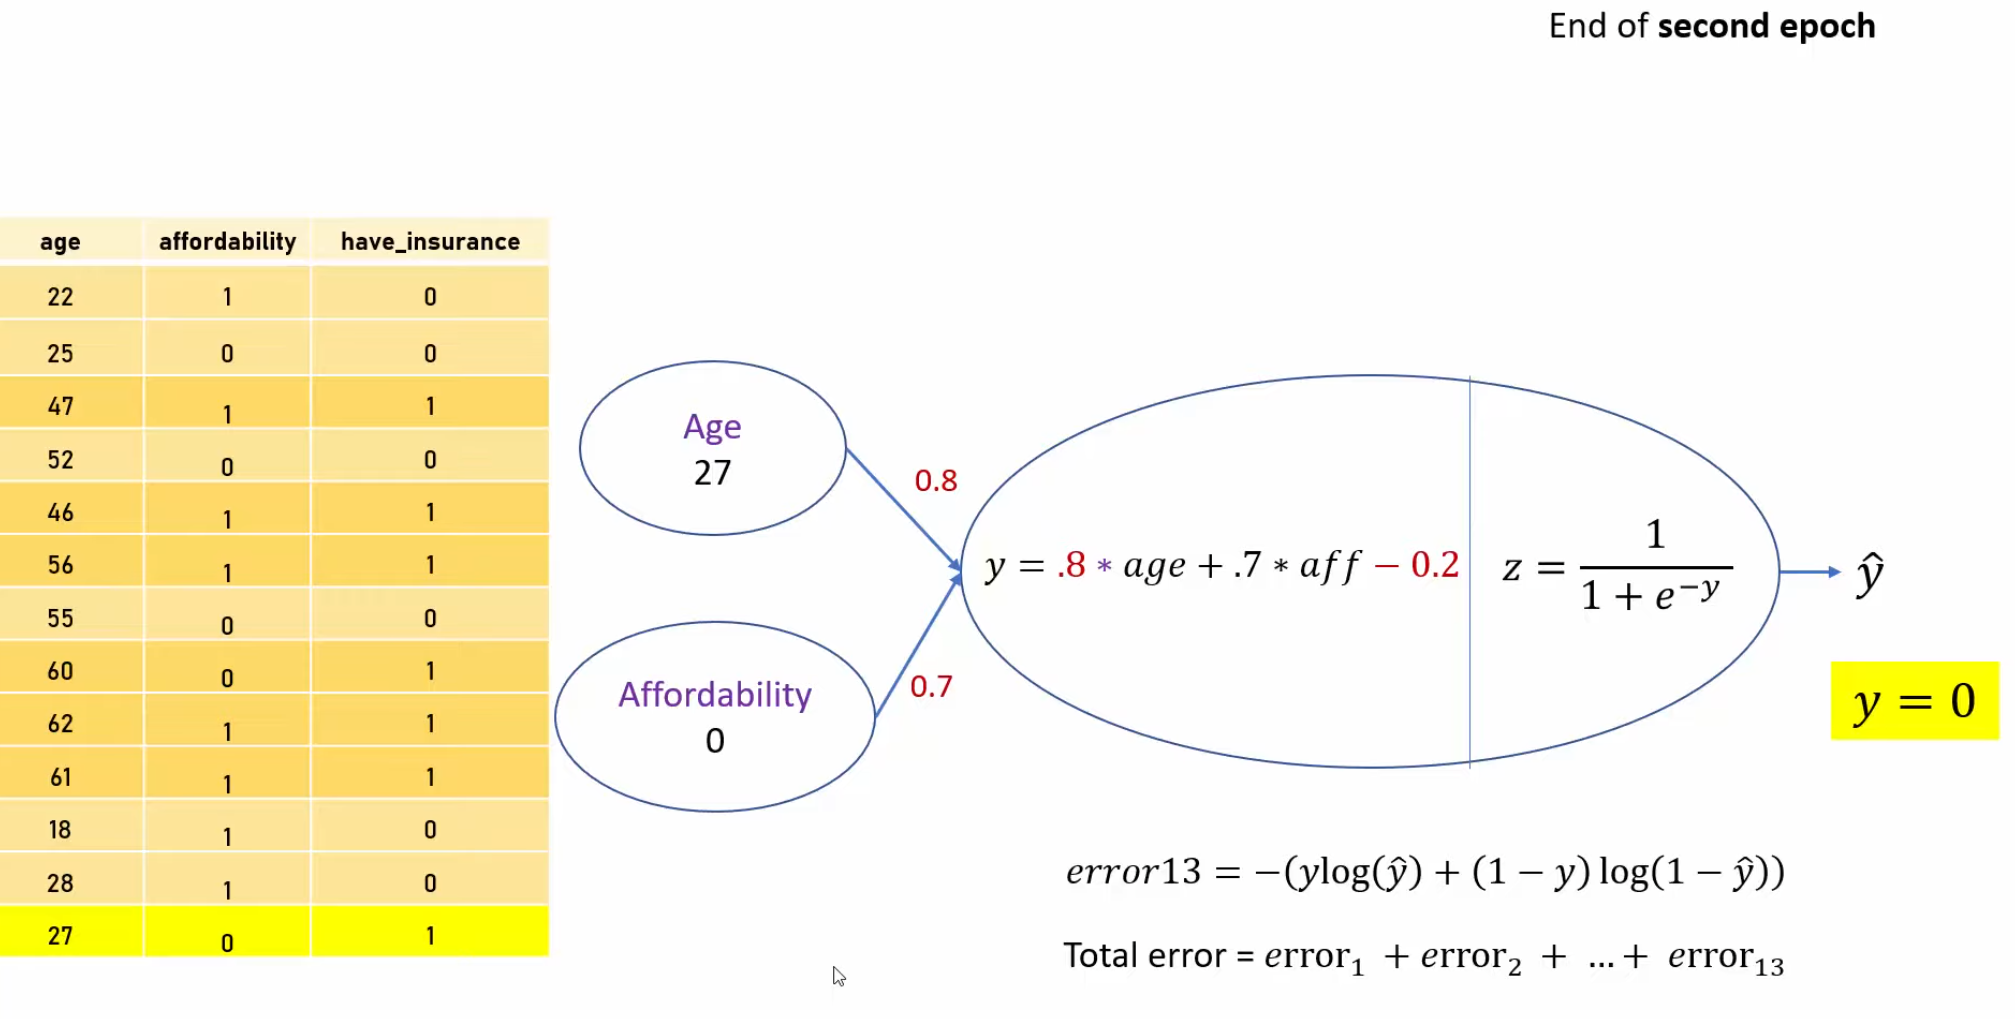

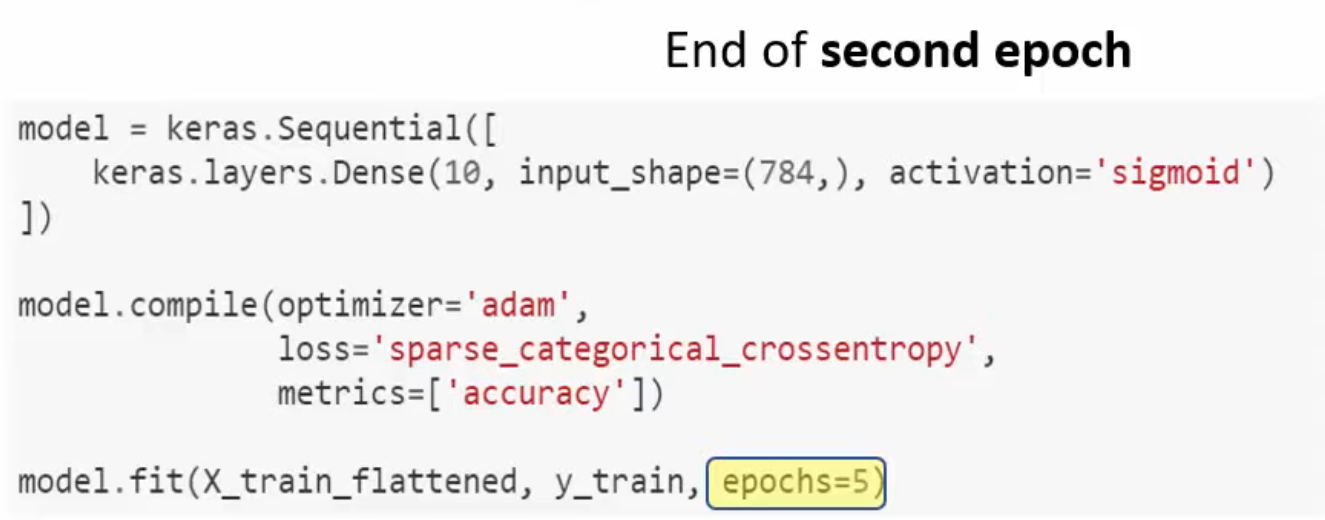

# **3D Chart vs 2d Chart**

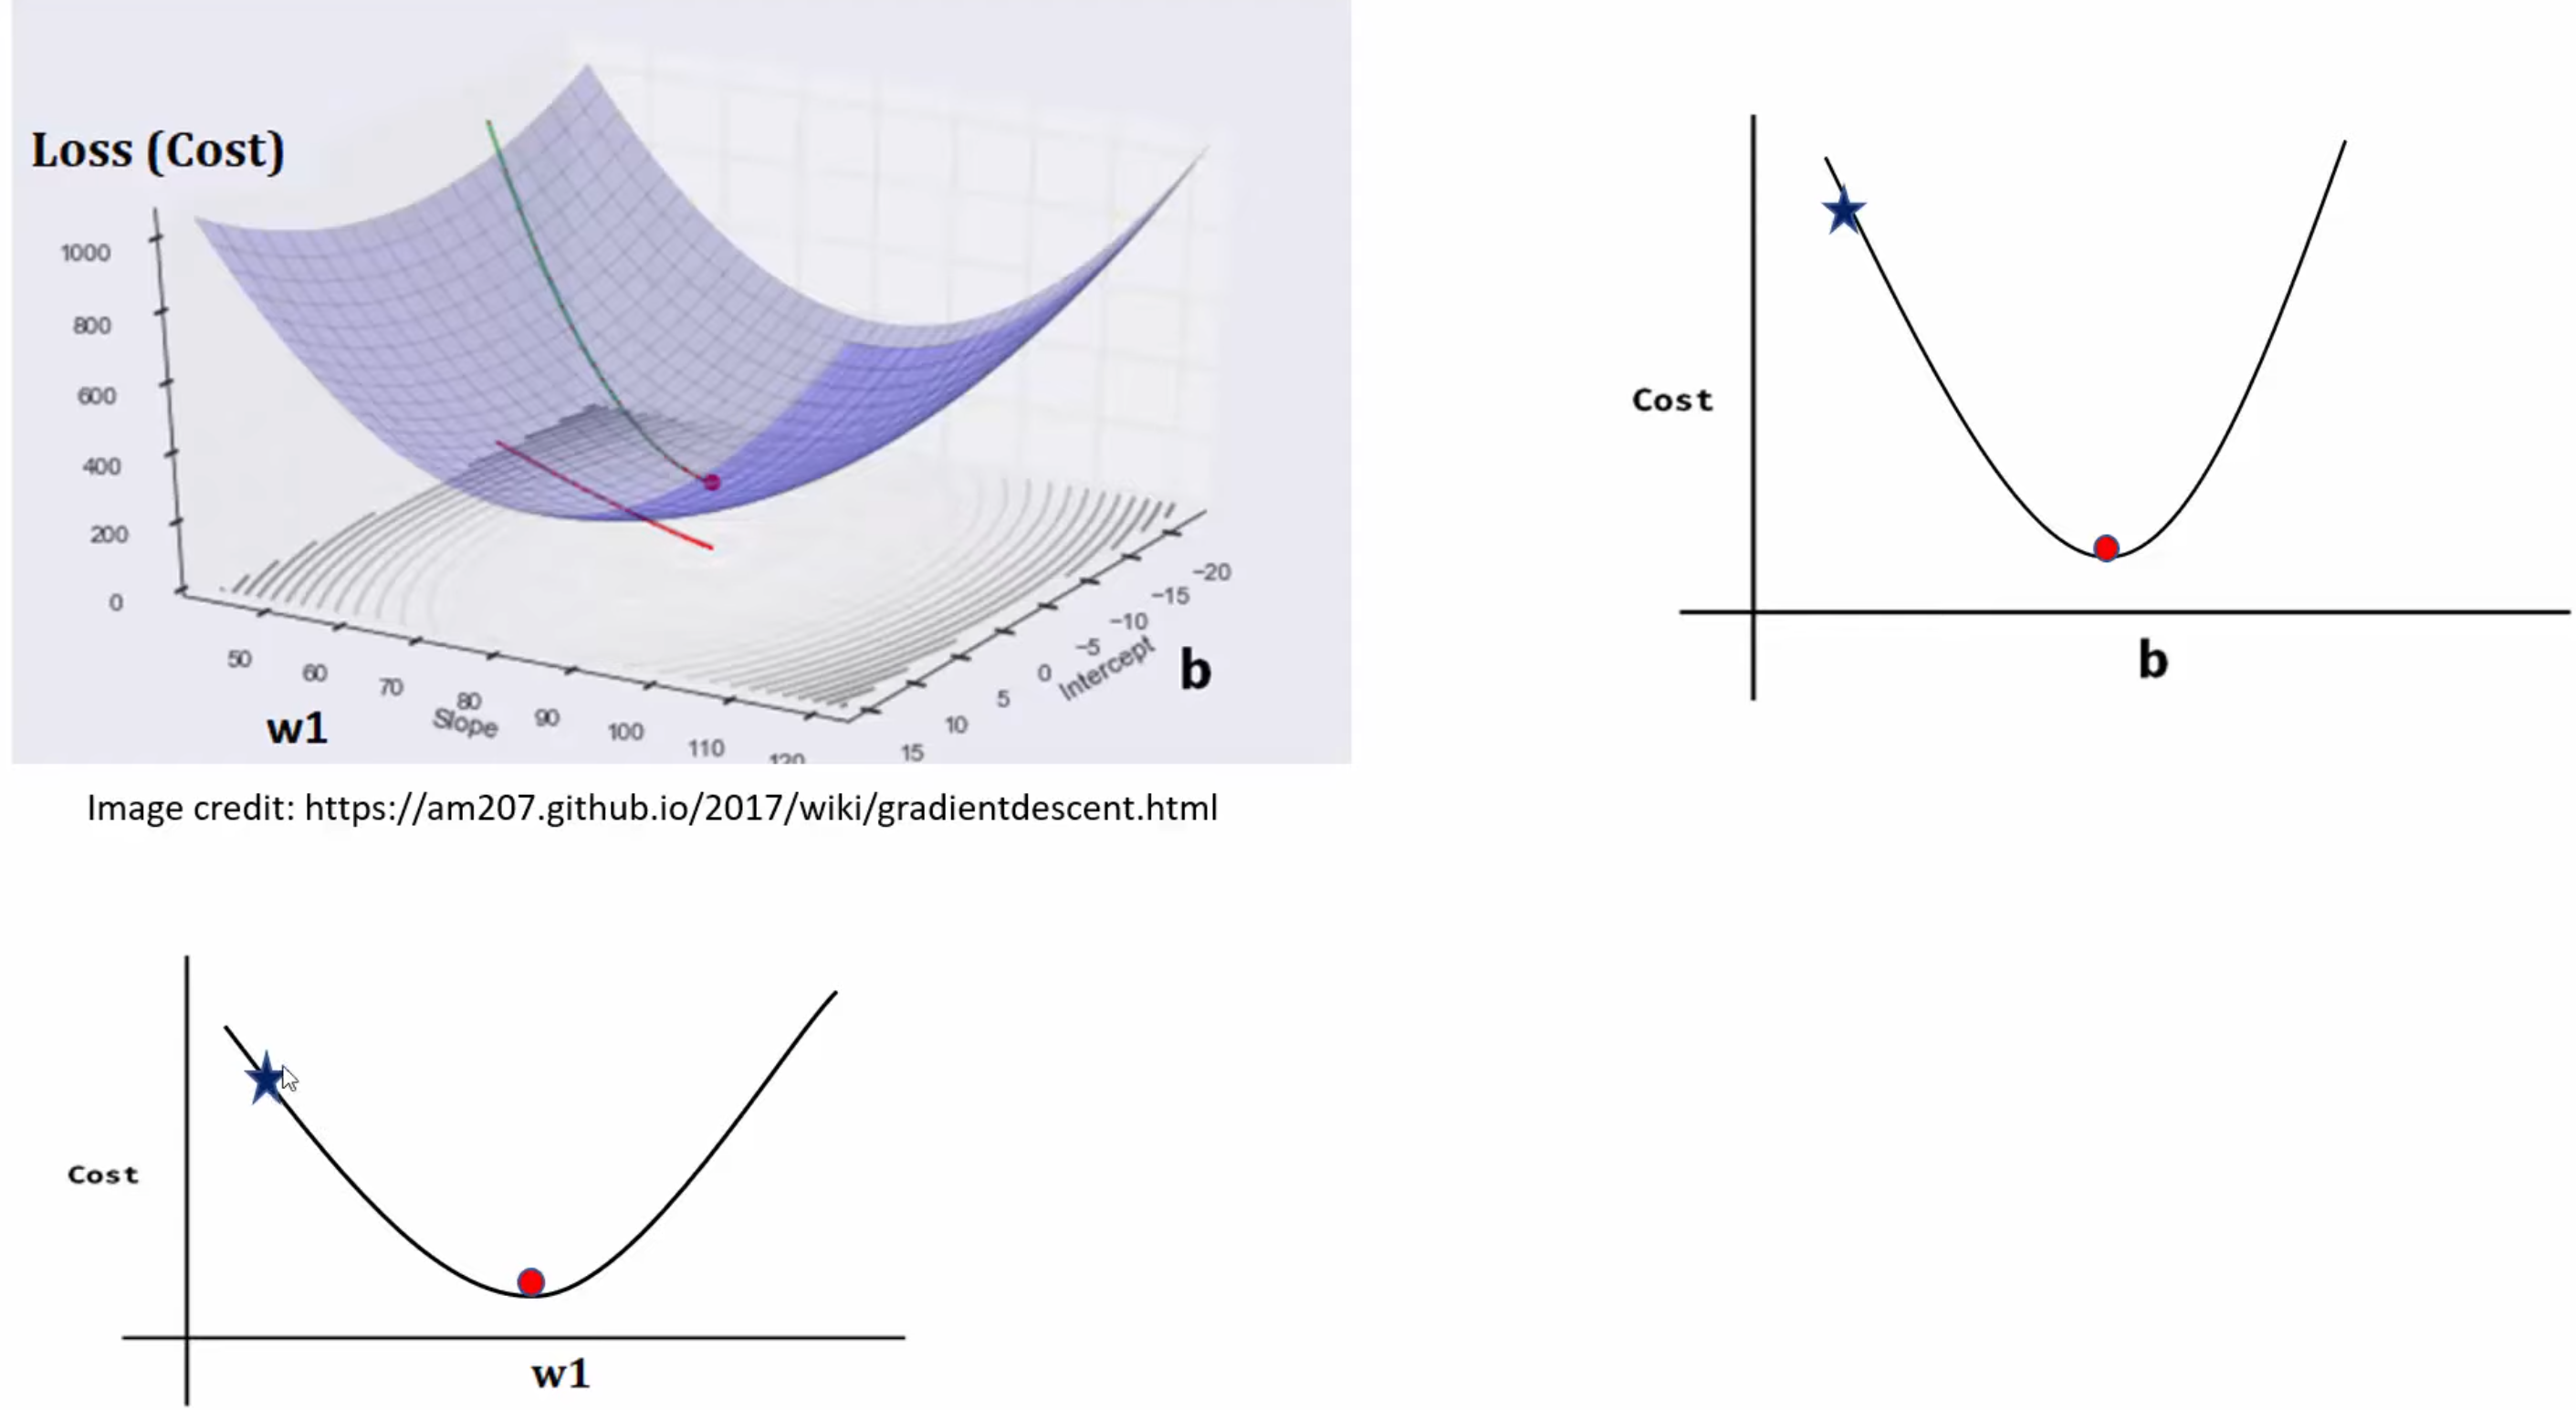

**How the process works**

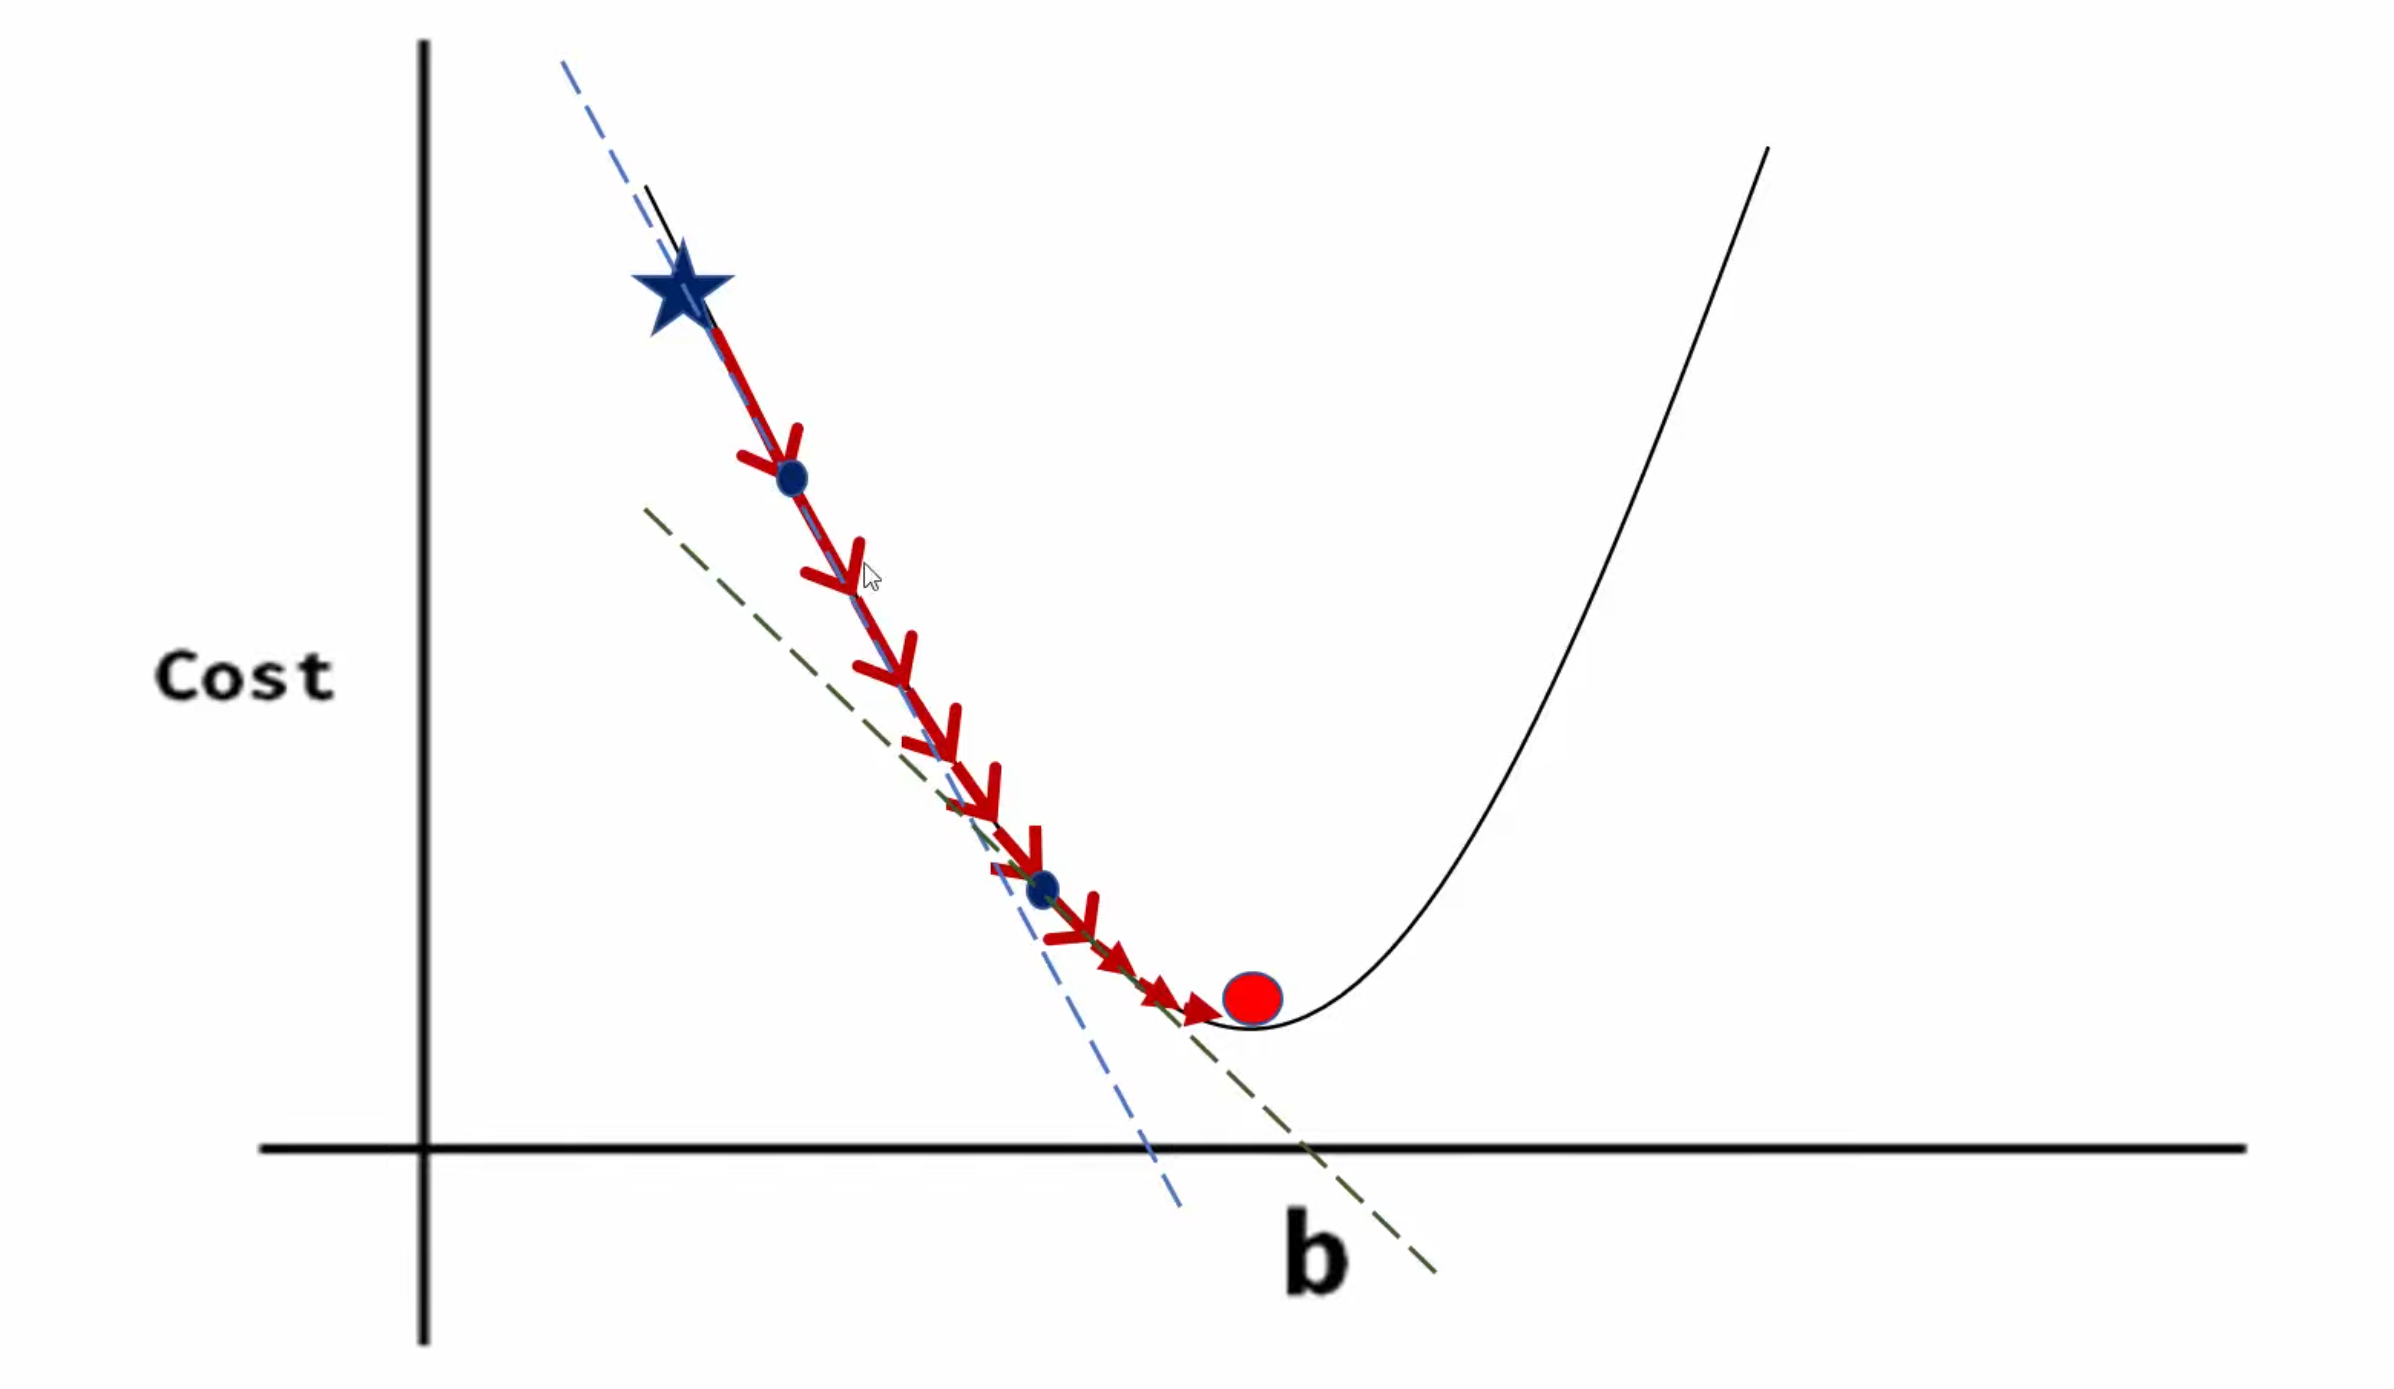

# **Coding**

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data = pd.read_csv('insurance_data.csv')

In [35]:
data.head()

age  affordibility  bought_insurance
0   22              1                 0
1   25              0                 0
2   47              1                 1
3   52              0                 0
4   46              1                 1

**Preprocess the data**

In [36]:
from sklearn.model_selection import train_test_split
X = data[['age', 'affordibility']]
y = data.bought_insurance
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
len(X_train)

22

In [38]:
len(y_train)

22

In [39]:
len(X_test)

6

In [40]:
len(y_test)

6

Scaling the age between 0 to 1 

In [41]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [42]:
X_train_scaled

age  affordibility
17  0.58              1
22  0.40              1
11  0.28              1
13  0.29              0
15  0.55              1
1   0.25              0
4   0.46              1
5   0.56              1
2   0.47              1
16  0.25              0
23  0.45              1
3   0.52              0
26  0.23              1
24  0.50              1
18  0.19              0
27  0.46              1
20  0.21              1
7   0.60              0
10  0.18              1
14  0.49              1
19  0.18              1
6   0.55              0

**To bring the all variables to same scale to better performance of model**

In [43]:
import keras

In [44]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (2,), activation='sigmoid' , kernel_initializer='ones', bias_initializer='zeros')
])
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=2000, validation_data=(X_test_scaled, y_test))

C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7428 - val_accuracy: 0.5000 - val_loss: 0.6171
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5000 - loss: 0.7424 - val_accuracy: 0.5000 - val_loss: 0.6168
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.5000 - loss: 0.7420 - val_accuracy: 0.5000 - val_loss: 0.6165
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.5000 - loss: 0.7416 - val_accuracy: 0.5000 - val_loss: 0.6162
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5000 - loss: 0.7411 - val_accuracy: 0.5000 - val_loss: 0.6159
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5000 - loss: 0.7407 - val_accuracy: 0.5000 - val_loss: 0.6156
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.5000 - loss: 0.7403 - val_accuracy: 0.5000 - val_loss: 0.6153
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5000 - loss: 0.7399 - val_accuracy: 0.500

In [45]:
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8333 - loss: 0.4487


[0.4487466812133789, 0.8333333134651184]

In [46]:
X_test_scaled

age  affordibility
9   0.61              1
25  0.54              1
8   0.62              1
21  0.26              0
0   0.22              1
12  0.27              0

In [49]:
y_pred = model.predict(X_test_scaled)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


array([[0.69667774],
       [0.66444933],
       [0.7011371 ],
       [0.35080245],
       [0.50126356],
       [0.35564375]], dtype=float32)

In [50]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64

**Now get the value of weights and bias from the model**

In [51]:
coef, intercept = model.get_weights()

In [52]:
coef, intercept

(array([[2.1191611],
        [0.7053343]], dtype=float32),
 array([-1.1664956], dtype=float32))

**This means w1=5.060867, w2=1.4086502, bias =-2.9137027**

In [54]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [55]:
X_test

age  affordibility
9    61              1
25   54              1
8    62              1
21   26              0
0    22              1
12   27              0

**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [56]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

C:\Users\abhis\AppData\Local\Temp\ipykernel_2764\396317115.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.6306122805067754

In [57]:
prediction_function(.18, 1)

C:\Users\abhis\AppData\Local\Temp\ipykernel_2764\396317115.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.48008247736571796

**Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First write couple of helper routines such as sigmoid and log_loss**


In [59]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [60]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

**All right now comes the time to implement our final gradient descent function !! yay !!!**

In [61]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [62]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.9736899318847281, w2:0.931388810977659, bias:-0.11748951666770448, loss:0.7428288579142563
Epoch:1, w1:0.9536535852311093, w2:0.8740290167758512, bias:-0.21881533456146035, loss:0.7072146449948487
Epoch:2, w1:0.9393731039296968, w2:0.8271852202997496, bias:-0.3053620401943441, loss:0.6814881914786812
Epoch:3, w1:0.930193258899806, w2:0.7897792032048467, bias:-0.37884372361582785, loss:0.6633428084673968
Epoch:4, w1:0.9254091137248937, w2:0.7605726653866934, bias:-0.441082368200183, loss:0.650742850709519
Epoch:5, w1:0.9243325693598606, w2:0.738313053647322, bias:-0.4938425798625155, loss:0.6420508089402462
Epoch:6, w1:0.9263332963572349, w2:0.7218280753843739, bias:-0.5387319906498417, loss:0.6360356979531206
Epoch:7, w1:0.9308580975636879, w2:0.7100747303660235, bias:-0.5771558825717441, loss:0.631816485354411
Epoch:8, w1:0.9374354910317361, w2:0.7021560855322683, bias:-0.6103083840841516, loss:0.6287844495353144
Epoch:9, w1:0.9456716791005844, w2:0.6973185496313956, bia

(6.729458709063028, 1.3482027165467205, -3.5831821575352403)

In [63]:
coef, intercept

(array([[2.1191611],
        [0.7053343]], dtype=float32),
 array([-1.1664956], dtype=float32))

**This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function**